# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress
import gmaps
import pandas as pd
from pprint import pprint
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Import API key
from api_keys_mlopez import weather_api_key
from api_keys_mlopez import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[0:8]

['punta arenas',
 'chumikan',
 'ushuaia',
 'viedma',
 'saint-philippe',
 'east london',
 'cape town',
 'albany']

In [4]:
#Source:  Burundi lesson
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#Imperial for a Farenheit reading
units = "imperial"

In [5]:
#Source:  Burundi lesson
# Build query URL and request your results in Celsius
city = "Rikitea"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)

print(weather_response.status_code)

weather_json = weather_response.json()

200


In [6]:
weather_json

{'coord': {'lon': -134.9692, 'lat': -23.1203},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 79,
  'feels_like': 79,
  'temp_min': 79,
  'temp_max': 79,
  'pressure': 1020,
  'humidity': 72,
  'sea_level': 1020,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 18.37, 'deg': 107, 'gust': 19.82},
 'clouds': {'all': 12},
 'dt': 1644205749,
 'sys': {'country': 'PF', 'sunrise': 1644158579, 'sunset': 1644205500},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [7]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1644205749,
 'id': 4030556,
 'main': {'feels_like': 79,
          'grnd_level': 1017,
          'humidity': 72,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 79,
          'temp_max': 79,
          'temp_min': 79},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1644158579, 'sunset': 1644205500},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 107, 'gust': 19.82, 'speed': 18.37}}


In [8]:
cid = weather_json["id"]
city = weather_json["name"]
cloudiness = weather_json["clouds"]["all"]
country = weather_json["sys"]["country"]

dt = weather_json["dt"]
humidity = weather_json["main"]["humidity"]
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]

max_temp = weather_json["main"]["temp_max"]
wnd_spd = weather_json["wind"]["speed"]
pressure = weather_json["main"]["pressure"]

In [9]:
#Change city from Sindon to Rikitea
lat,lng

(-23.1203, -134.9692)

In [10]:
cities[-8:]

['lamu',
 'tecoanapa',
 'hoi an',
 'kudahuvadhoo',
 'camalu',
 'buchanan',
 'paris',
 'bontang']

In [17]:
lngs = []
lats = []
names = []
countries = []
temps = []
humidities = []
winds = []
clouds = []
pressures = []
dts = []

for city in cities[0:612]:
    
    #Requesting Json
    print(city)
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    if (weather_response.status_code == 200):
    
    
        #Obtaining weather information
        weather_json = weather_response.json()

        #Results obtained
        cid = weather_json["id"]
        city = weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]

        dt = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]

        max_temp = weather_json["main"]["temp_max"]
        wnd_spd = weather_json["wind"]["speed"]
        pressure = weather_json["main"]["pressure"]

        #Create lists
        lngs.append(lng)
        lats.append(lat)
        names.append(city)
        countries.append(country)
        temps.append(max_temp)
        humidities.append(humidity)
        winds.append(wnd_spd)
        clouds.append(cloudiness)
        dts.append(dt)
        pressures.append(pressure)
        
    time.sleep(1)

punta arenas
200

chumikan
200

ushuaia
200

viedma
200

saint-philippe
200

east london
200

cape town
200

albany
200

keetmanshoop
200

chuy
200

pundaguitan
200

new norfolk
200

taolanaro
404

butaritari
200

port alfred
200

yellowknife
200

rikitea
200

ponta do sol
200

palana
200

yumen
200

cabo san lucas
200

hobart
200

samarai
200

hilo
200

lasa
200

victoria
200

souillac
200

omboue
200

bredasdorp
200

yining
200

clyde river
200

castro
200

airai
200

tanda
200

lewiston
200

carnarvon
200

kapaa
200

kavaratti
200

faanui
200

hithadhoo
200

qaanaaq
200

san cristobal
200

lata
200

vaini
200

qaqortoq
200

cascais
200

pevek
200

belushya guba
404

sembakung
200

cidreira
200

yakima
200

mataura
200

mahebourg
200

melfi
200

bambanglipuro
200

saskylakh
200

chokurdakh
200

hasaki
200

georgetown
200

pangody
200

hendijan
404

vila velha
200

manitouwadge
200

samalaeulu
404

sangar
200

busselton
200

gidam
200

puerto ayora
200

cairns
200

yinchuan
200

atuon

chagda
404

chifeng
200

danielskuil
200

geraldton
200

seydi
200

altar
200

oussouye
200

namatanai
200

zirgan
200

atlantic city
200

salym
200

komsomolskiy
200

stephenville
200

kamenskoye
404

barbar
404

dukat
200

ahuimanu
200

tayu
200

westpunt
404

amalapuram
200

rurrenabaque
200

dryden
200

kalaleh
200

salalah
200

dunedin
200

yarke pole
200

vao
200

lamu
200

tecoanapa
200

hoi an
200

kudahuvadhoo
200

camalu
200

buchanan
200



In [18]:
df = pd.DataFrame()

df["Latitude"] = lats
df["Longitude"] = lngs

df["City"] = names
df["Country"] = countries
df["Max_Temp"] = temps
df["Humidity"] = humidities
df["Wnd_Spd"] = winds
df["Cloudiness"] = clouds
df["Dates"] = dts
df["Pressure"] = pressures

df.head()

,Latitude,Longitude,City,Country,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
0,-53.1500,-70.9167,Punta Arenas,CL,53.71,82,10.36,75,1644205844,1005
1,54.7183,135.3150,Chumikan,RU,0.86,78,13.82,15,1644205845,1020
2,-54.8000,-68.3000,Ushuaia,AR,60.46,67,14.97,40,1644205846,1005
3,-40.8135,-62.9967,Viedma,AR,60.89,77,8.57,0,1644205848,1019
4,-21.3585,55.7679,Saint-Philippe,RE,80.19,83,15.12,94,1644205849,1014


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    564 non-null    float64
 1   Longitude   564 non-null    float64
 2   City        564 non-null    object 
 3   Country     564 non-null    object 
 4   Max_Temp    564 non-null    float64
 5   Humidity    564 non-null    int64  
 6   Wnd_Spd     564 non-null    float64
 7   Cloudiness  564 non-null    int64  
 8   Dates       564 non-null    int64  
 9   Pressure    564 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.2+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
df.to_csv("my_cities.csv", index=False)

In [21]:
df.head()

,Latitude,Longitude,City,Country,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
0,-53.1500,-70.9167,Punta Arenas,CL,53.71,82,10.36,75,1644205844,1005
1,54.7183,135.3150,Chumikan,RU,0.86,78,13.82,15,1644205845,1020
2,-54.8000,-68.3000,Ushuaia,AR,60.46,67,14.97,40,1644205846,1005
3,-40.8135,-62.9967,Viedma,AR,60.89,77,8.57,0,1644205848,1019
4,-21.3585,55.7679,Saint-Philippe,RE,80.19,83,15.12,94,1644205849,1014


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    564 non-null    float64
 1   Longitude   564 non-null    float64
 2   City        564 non-null    object 
 3   Country     564 non-null    object 
 4   Max_Temp    564 non-null    float64
 5   Humidity    564 non-null    int64  
 6   Wnd_Spd     564 non-null    float64
 7   Cloudiness  564 non-null    int64  
 8   Dates       564 non-null    int64  
 9   Pressure    564 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.2+ KB


In [23]:
#  Get the indices of cities that have humidity over 100%.
df.describe()

,Latitude,Longitude,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000
mean,20.937476,24.818725,48.774433,73.765957,7.629787,57.273050,1.644206e+09,1015.416667
std,32.601659,90.107749,31.743087,20.355417,7.041148,39.785882,2.863563e+02,10.587459
min,-54.800000,-175.200000,-40.270000,11.000000,0.000000,0.000000,1.644205e+09,970.000000
25%,-3.673875,-54.465050,29.467500,63.750000,3.125000,14.000000,1.644206e+09,1011.000000
50%,24.816650,30.802100,59.205000,77.000000,5.760000,69.500000,1.644206e+09,1015.000000
75%,47.801425,106.147475,75.387500,90.000000,10.292500,99.000000,1.644206e+09,1023.000000
max,78.218600,179.316700,91.710000,100.000000,63.040000,100.000000,1.644207e+09,1038.000000


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
mask = df.Humidity <=100
df_sub = df.loc[mask].dropna().reset_index(drop=True)

In [25]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    564 non-null    float64
 1   Longitude   564 non-null    float64
 2   City        564 non-null    object 
 3   Country     564 non-null    object 
 4   Max_Temp    564 non-null    float64
 5   Humidity    564 non-null    int64  
 6   Wnd_Spd     564 non-null    float64
 7   Cloudiness  564 non-null    int64  
 8   Dates       564 non-null    int64  
 9   Pressure    564 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.2+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

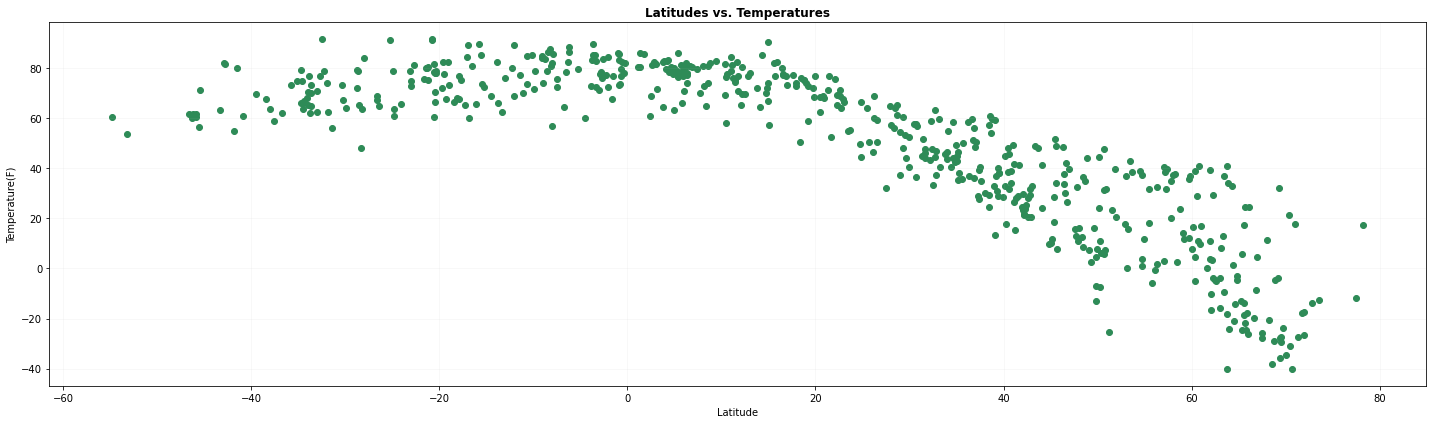

In [26]:
plt.figure(figsize=(20,6))

plt.scatter(df_sub.Latitude, df_sub.Max_Temp, color="seagreen")

plt.title ("Latitudes vs. Temperatures", fontweight="bold", fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_temps_ml.png")
plt.show()

## Latitude vs. Humidity Plot

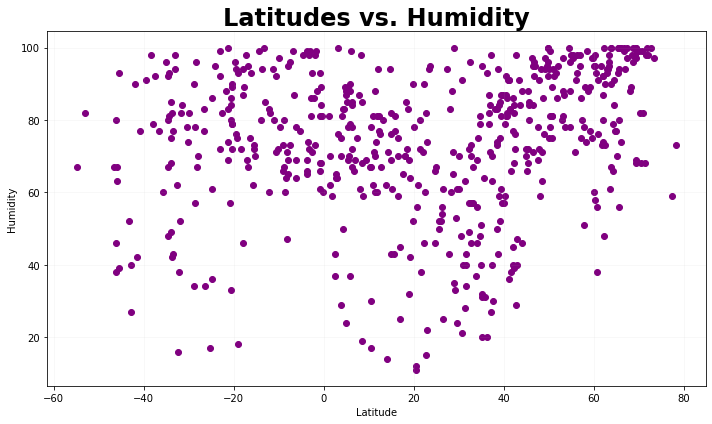

In [27]:
plt.figure(figsize=(10,6))

plt.scatter(df_sub.Latitude, df_sub.Humidity, color="purple")

plt.title ("Latitudes vs. Humidity", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_humidities_ml.png")
plt.show()

## Latitude vs. Cloudiness Plot

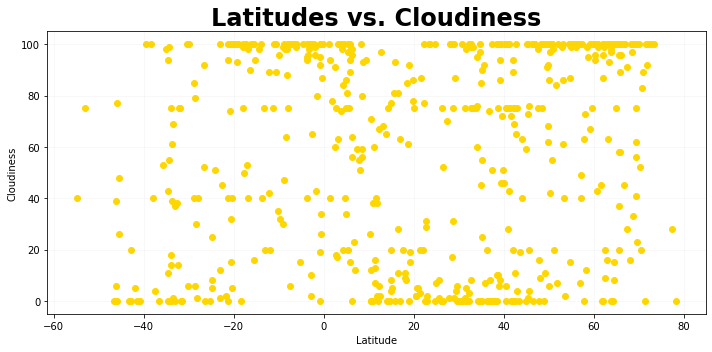

In [54]:
plt.figure(figsize=(10,5))

plt.scatter(df_sub.Latitude, df_sub.Cloudiness, color="gold")

plt.title ("Latitudes vs. Cloudiness", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_cloudiness_ml.png")
plt.show()

## Latitude vs. Wind Speed Plot

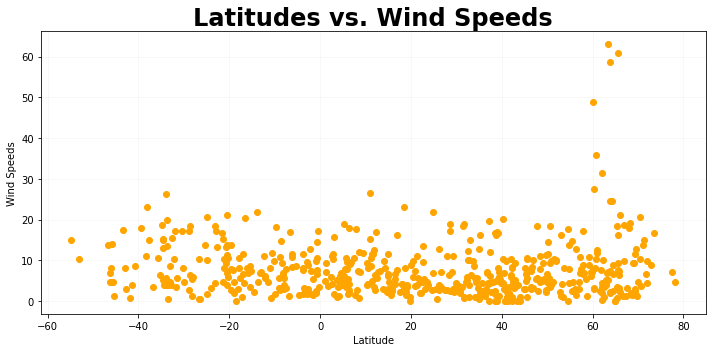

In [29]:
plt.figure(figsize=(10,5))

plt.scatter(df_sub.Latitude, df_sub.Wnd_Spd, color="orange")

plt.title ("Latitudes vs. Wind Speeds", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_wnd_spd_ml.png")
plt.show()

## Linear Regression

In [30]:
north = df_sub.loc[df_sub.Latitude >= 0]
south = df_sub.loc[df_sub.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8011238104341065


C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/3724407388.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="skyblue")


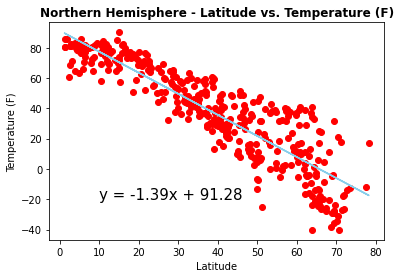

In [42]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="skyblue")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Northern Hemisphere - Latitude vs. Temperature (F)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [33]:
feature = north[["Latitude"]]
target = north["Max_Temp"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max_Temp   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.62e-141
Time:                        22:08:20   Log-Likelihood:                -1625.1
No. Observations:                 399   AIC:                             3254.
Df Residuals:                     397   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2756      1.503     60.712      0.000      88.320      94.231
Latitude      -1.3908      0.035    -39.990      0.000      -1.459      -1.322
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.647
Skew:                           0.077   Prob(JB):                        0.724
Kurtosis:                       3.124   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.39076377]
91.2755791723977


In [35]:
actual = north["Max_Temp"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.8011238104341061
MSE: 201.96621375258553
RMSE: 14.211481757810672
MAE: 11.127408082874686


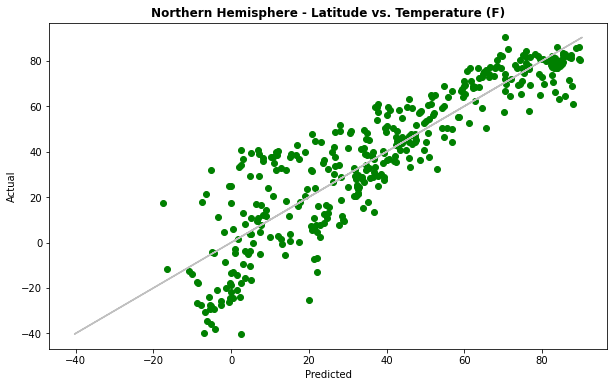

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Northern Hemisphere - Latitude vs. Temperature (F)", fontweight="bold")

plt.show()

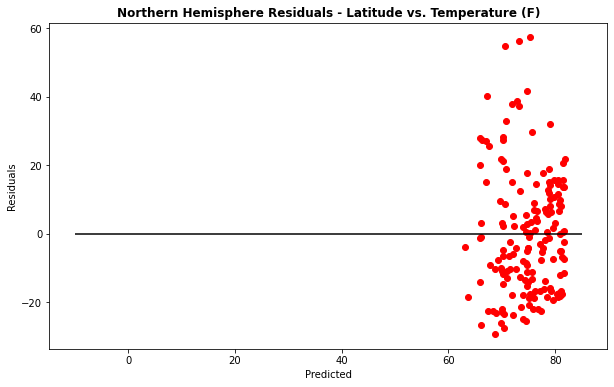

In [68]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="red")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Northern Hemisphere Residuals - Latitude vs. Temperature (F)", fontweight="bold")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2613805859570933


C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/2055992787.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="green")


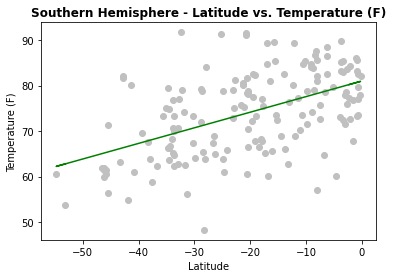

In [46]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="green")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - Latitude vs. Temperature (F)", fontweight="bold") 

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [47]:
feature = south[["Latitude"]]
target = south["Max_Temp"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max_Temp   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     57.68
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.27e-12
Time:                        22:12:45   Log-Likelihood:                -574.79
No. Observations:                 165   AIC:                             1154.
Df Residuals:                     163   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9880      1.110     72.969      0.000      78.796      83.180
Latitude       0.3424      0.045      7.595      0.000       0.253       0.431
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.058
Skew:                          -0.004   Prob(JB):                        0.971
Kurtosis:                       3.092   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.34243922]
80.98796843794773


In [49]:
actual = south["Max_Temp"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.26138058595709357
MSE: 62.13329470332308
RMSE: 7.882467551682219
MAE: 6.4303263773600765


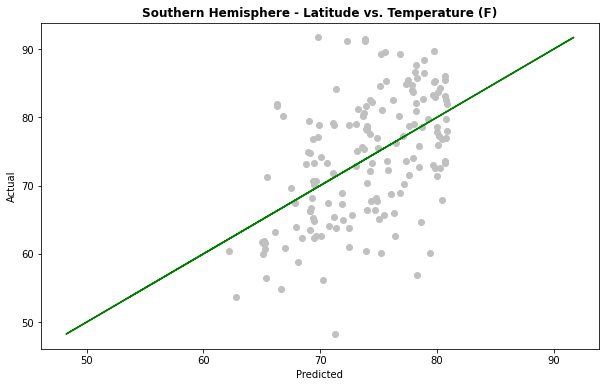

In [50]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="silver")
plt.plot(actual, actual, color="green")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Southern Hemisphere - Latitude vs. Temperature (F)", fontweight="bold") 

plt.show()

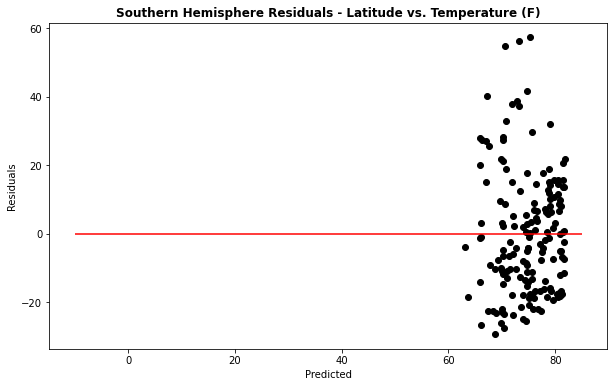

In [69]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="red")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Southern Hemisphere Residuals - Latitude vs. Temperature (F)", fontweight="bold") 

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/3143380918.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="black")


The r-squared is: 0.15171007477543352


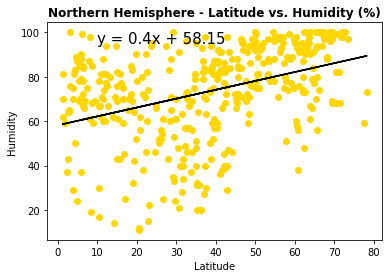

In [55]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold")
plt.plot(x_values,regress_values,"r-", color="black")

plt.annotate(line_eq,(10,95),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity (%)", fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [56]:
feature = north[["Latitude"]]
target = north["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     71.00
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           6.64e-16
Time:                        22:18:36   Log-Likelihood:                -1748.5
No. Observations:                 399   AIC:                             3501.
Df Residuals:                     397   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1463      2.048     28.385      0.000      54.119      62.174
Latitude       0.3993      0.047      8.426      0.000       0.306       0.492
==============================================================================
Omnibus:                       36.676   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.069
Skew:                          -0.823   Prob(JB):                     1.63e-10
Kurtosis:                       3.050   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.39927626]
58.14633250965872


In [58]:
actual = north["Humidity"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.1517100747754334
MSE: 374.94339031349995
RMSE: 19.36345502005001
MAE: 15.612857375660885


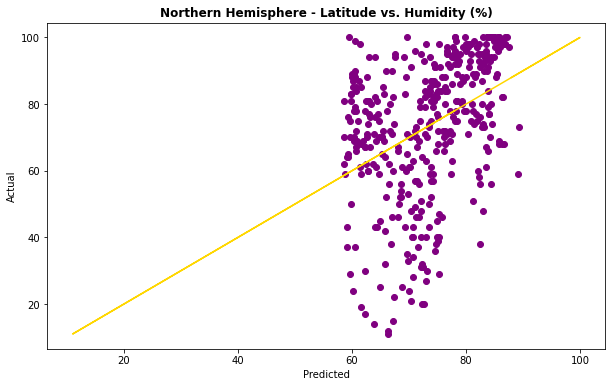

In [59]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="purple")
plt.plot(actual, actual, color="gold")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Northern Hemisphere - Latitude vs. Humidity (%)", fontweight="bold")

plt.show()

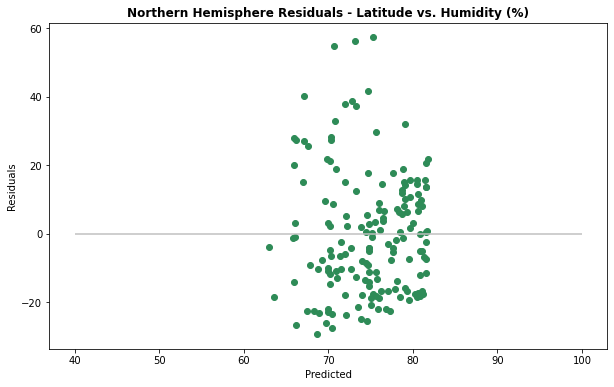

In [70]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="seagreen")
plt.hlines(0, 40, 100, colors="silver")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Northern Hemisphere Residuals - Latitude vs. Humidity (%)", fontweight="bold")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/1642628277.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="gold")


The r-squared is: 0.0642560862955503


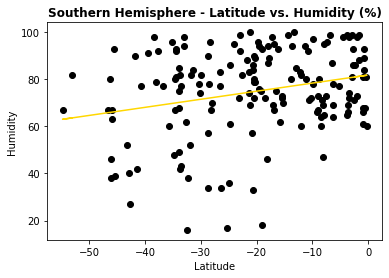

In [63]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="black")
plt.plot(x_values,regress_values,"r-", color="gold")

plt.annotate(line_eq,(10,95),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Latitude vs. Humidity (%)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [62]:
feature = south[["Latitude"]]
target = south["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     11.19
Date:                Sun, 06 Feb 2022   Prob (F-statistic):            0.00102
Time:                        22:19:09   Log-Likelihood:                -710.37
No. Observations:                 165   AIC:                             1425.
Df Residuals:                     163   BIC:                             1431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8120      2.524     32.410      0.000      76.827      86.796
Latitude       0.3431      0.103      3.346      0.001       0.141       0.546
==============================================================================
Omnibus:                       16.872   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.811
Skew:                          -0.796   Prob(JB):                     8.23e-05
Kurtosis:                       3.447   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.34307619]
81.81196814958216


In [65]:
actual = south["Humidity"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.06425608629555035
MSE: 321.3911373476948
RMSE: 17.9273851229814
MAE: 14.349026494137174


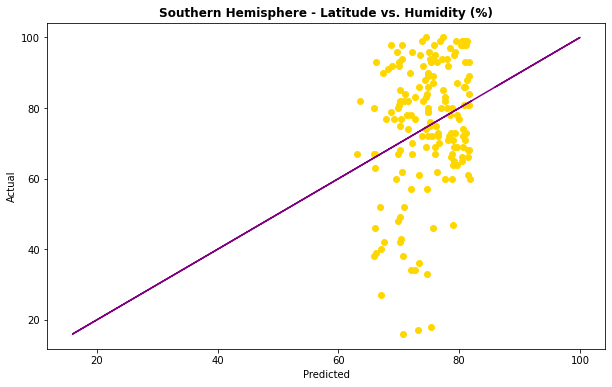

In [66]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="gold")
plt.plot(actual, actual, color="purple")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Southern Hemisphere - Latitude vs. Humidity (%)", fontweight="bold")

plt.show()

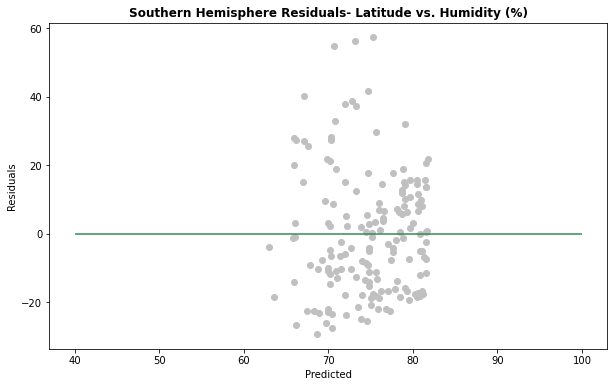

In [67]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="silver")
plt.hlines(0, 40, 100, colors="seagreen")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Southern Hemisphere Residuals- Latitude vs. Humidity (%)", fontweight="bold")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/2506740783.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="silver")


The r-squared is: 0.04423124150376589


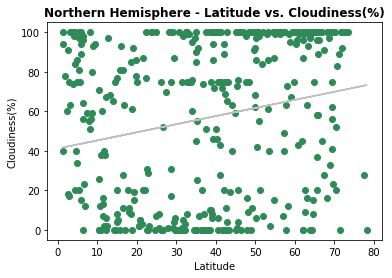

In [71]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="seagreen")
plt.plot(x_values,regress_values,"r-", color="silver")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Northern Hemisphere - Latitude vs. Cloudiness(%)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [72]:
feature = north[["Latitude"]]
target = north["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.37
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.28e-05
Time:                        22:21:55   Log-Likelihood:                -2028.8
No. Observations:                 399   AIC:                             4062.
Df Residuals:                     397   BIC:                             4070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2008      4.135      9.965      0.000      33.072      49.329
Latitude       0.4100      0.096      4.286      0.000       0.222       0.598
==============================================================================
Omnibus:                     4057.479   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.955
Skew:                          -0.296   Prob(JB):                     4.70e-10
Kurtosis:                       1.505   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.40996405]
41.200759915836095


In [74]:
actual = north["Cloudiness"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.04423124150376556
MSE: 1527.5804343185023
RMSE: 39.084273490989986
MAE: 35.847435536936956


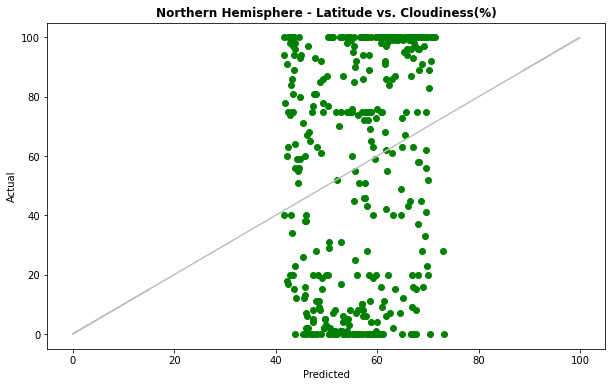

In [75]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness(%)", fontweight="bold")

plt.show()

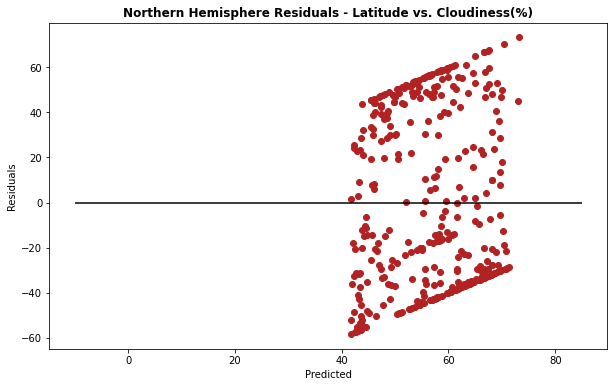

In [76]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="firebrick")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Northern Hemisphere Residuals - Latitude vs. Cloudiness(%)", fontweight="bold")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/2762297502.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="seagreen")


The r-squared is: 0.18054270315417273


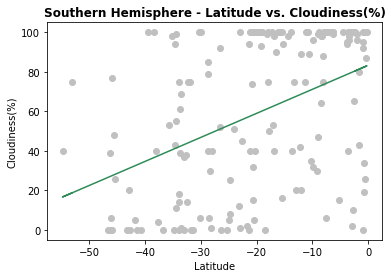

In [77]:
x_values = south['Latitude']
y_values = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="seagreen")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness(%)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [78]:
feature = south[["Latitude"]]
target = south["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     35.91
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.28e-08
Time:                        22:22:43   Log-Likelihood:                -822.91
No. Observations:                 165   AIC:                             1650.
Df Residuals:                     163   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.2762      4.993     16.679      0.000      73.417      93.135
Latitude       1.2155      0.203      5.993      0.000       0.815       1.616
==============================================================================
Omnibus:                       41.180   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.422
Skew:                          -0.295   Prob(JB):                      0.00546
Kurtosis:                       1.920   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.21547879]
83.27617567200748


In [80]:
actual = south["Cloudiness"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.18054270315417287
MSE: 1257.3354246195936
RMSE: 35.45892588079331
MAE: 31.27058345351814


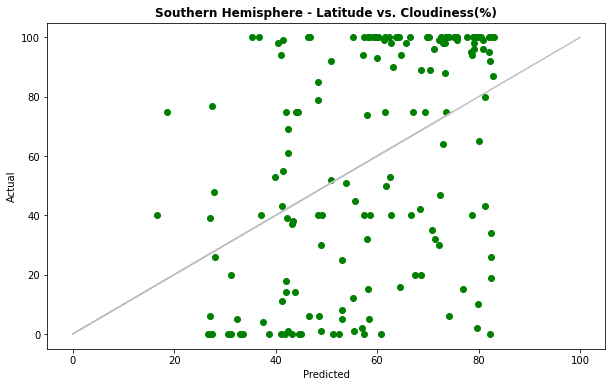

In [81]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness(%)", fontweight="bold")

plt.show()

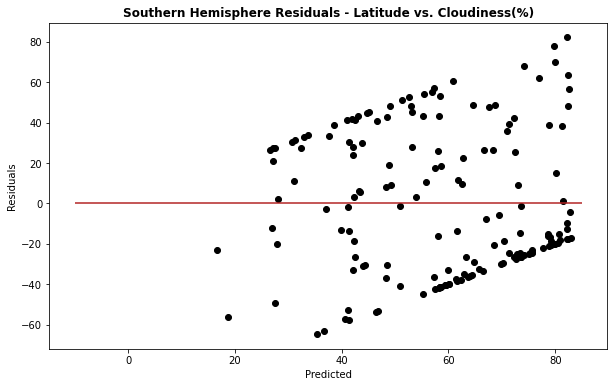

In [82]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="firebrick")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Southern Hemisphere Residuals - Latitude vs. Cloudiness(%)", fontweight="bold")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/2983025058.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="green")


The r-squared is: 0.01947489606470321


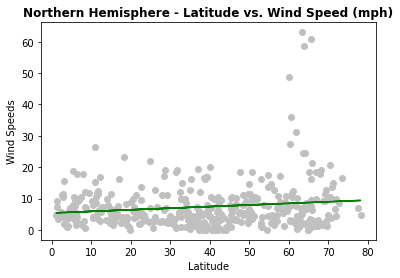

In [83]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Wnd_Spd']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="green")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')
plt.title("Northern Hemisphere - Latitude vs. Wind Speed (mph)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [84]:
feature = north[["Latitude"]]
target = north["Wnd_Spd"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Wnd_Spd   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.885
Date:                Sun, 06 Feb 2022   Prob (F-statistic):            0.00523
Time:                        22:23:40   Log-Likelihood:                -1367.8
No. Observations:                 399   AIC:                             2740.
Df Residuals:                     397   BIC:                             2747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3955      0.789      6.840      0.000       3.845       6.946
Latitude       0.0512      0.018      2.808      0.005       0.015       0.087
==============================================================================
Omnibus:                      331.674   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6768.464
Skew:                           3.463   Prob(JB):                         0.00
Kurtosis:                      21.951   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.05123558]
5.3954854003338975


In [86]:
actual = north["Wnd_Spd"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.019474896064703207
MSE: 55.59243014010381
RMSE: 7.456033137004141
MAE: 4.784796318452519


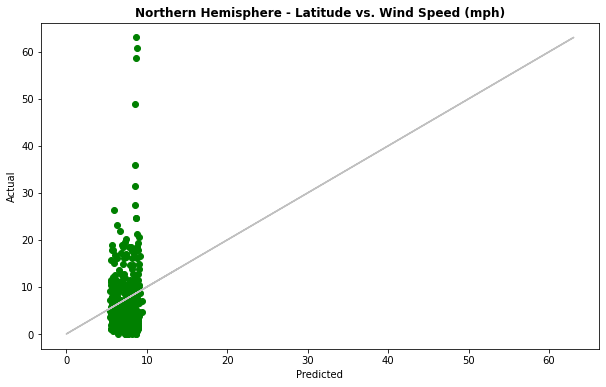

In [87]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed (mph)", fontweight="bold")

plt.show()

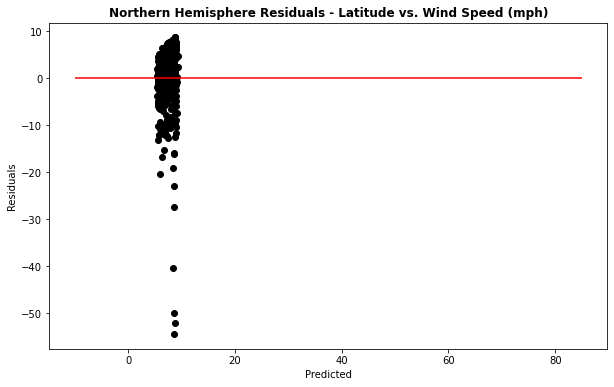

In [88]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="red")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Northern Hemisphere Residuals - Latitude vs. Wind Speed (mph)", fontweight="bold")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\E5450\AppData\Local\Temp/ipykernel_20508/3516201343.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="silver")


The r-squared is: 0.03418144411506593


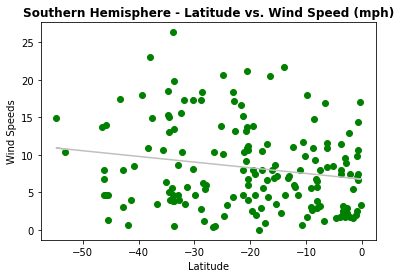

In [89]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Wnd_Spd']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="silver")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (mph)", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [90]:
feature = south[["Latitude"]]
target = south["Wnd_Spd"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Wnd_Spd   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     5.769
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0174
Time:                        22:24:47   Log-Likelihood:                -515.60
No. Observations:                 165   AIC:                             1035.
Df Residuals:                     163   BIC:                             1041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7703      0.775      8.732      0.000       5.239       8.301
Latitude      -0.0757      0.031     -2.402      0.017      -0.138      -0.013
==============================================================================
Omnibus:                       11.337   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.449
Skew:                           0.666   Prob(JB):                      0.00198
Kurtosis:                       2.813   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.07565025]
6.770303027056951


In [92]:
actual = south["Wnd_Spd"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.03418144411506574
MSE: 30.32046296671237
RMSE: 5.506401998284576
MAE: 4.522681524250553


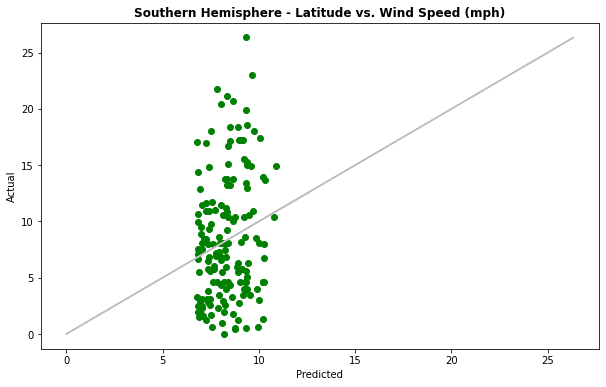

In [93]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (mph)", fontweight="bold")

plt.show()

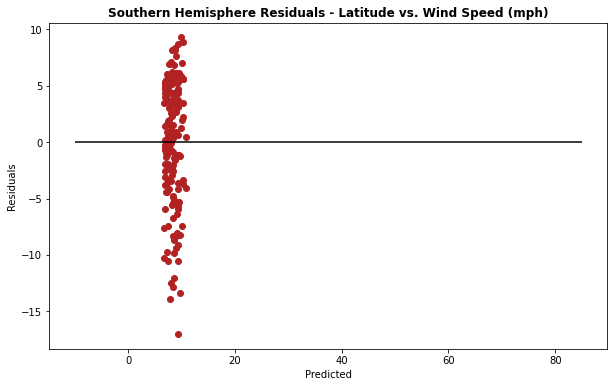

In [94]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="firebrick")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Southern Hemisphere Residuals - Latitude vs. Wind Speed (mph)", fontweight="bold")

plt.show()